# Part 2: Basic Data Analysis Tasks

## Data Cleaning and Statistics
### Task: Calculate the average votes of all movies and find the bottom 5 lowest-rated movies.

In [12]:
# Import necessary library
import pandas as pd

# Read imdb_movies.csv into a DataFrame
df = pd.read_csv('imdb_movies.csv')
df.head(5)


,Name,Rating,Votes,Year,Country,Genre
0,12 Angry Men,9.0,949K,1957,United States,Approved
1,The Shawshank Redemption,9.3,3.1M,1994,United States,R
2,The Dark Knight,9.1,3.1M,2008,"United States, United Kingdom",PG-13
3,Pulp Fiction,8.8,2.4M,1994,United States,R
4,The Godfather Part II,9.0,1.5M,1974,United States,R


In [13]:
import pandas as pd
import numpy as np

def convert_votes_to_numeric(vote_str):
    """Convert vote string with K/M units to numeric value"""
    if pd.isna(vote_str):
        return np.nan

    if isinstance(vote_str, str):
        # Remove commas from the string
        vote_str = vote_str.replace(',', '')
        # Handle million units
        if 'M' in vote_str:
            return float(vote_str.replace('M', '')) * 1_000_000
        # Handle thousand units
        elif 'K' in vote_str:
            return float(vote_str.replace('K', '')) * 1_000
        # Convert plain numbers
        else:
            try:
                return float(vote_str)
            except:
                return np.nan
    else:
        return vote_str

# Data cleaning: convert Votes to numeric and Rating to numeric
df['Votes'] = df['Votes'].apply(convert_votes_to_numeric)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Calculate average votes
average_votes = df['Votes'].mean()
print(f"Average number of votes across all movies: {average_votes:,.0f}")

# Find bottom 5 lowest-rated movies
bottom_5_rated = df.nsmallest(5, 'Rating')[['Name', 'Rating', 'Votes', 'Year', 'Country', 'Genre']]

print("\nBottom 5 lowest-rated movies:")
print(bottom_5_rated.to_string(index=False))  # Hide index for cleaner output


Average number of votes across all movies: 740,016

Bottom 5 lowest-rated movies:
           Name  Rating     Votes  Year                                Country     Genre
The Incredibles     8.0  873000.0  2004                          United States        PG
  Into the Wild     8.0  686000.0  2007                          United States         R
      Chinatown     8.1  370000.0  1974                          United States         R
 V for Vendetta     8.1 1200000.0  2005 United States, United Kingdom, Germany  (Banned)
       Rashômon     8.1  192000.0  1950                                  Japan Not Rated


Decade Statistics:


,decade,movie_count,avg_votes,avg_rating
0,1920,6,1.166667e+05,8.150000
1,1930,6,2.665000e+05,8.283333
2,1940,11,2.580909e+05,8.254545
3,1950,21,2.728095e+05,8.276190
4,1960,16,3.441875e+05,8.337500
5,1970,18,7.715556e+05,8.361111
6,1980,26,6.902308e+05,8.280769
7,1990,39,1.169949e+06,8.410256
8,2000,48,9.860208e+05,8.308333
9,2010,45,8.623111e+05,8.255556


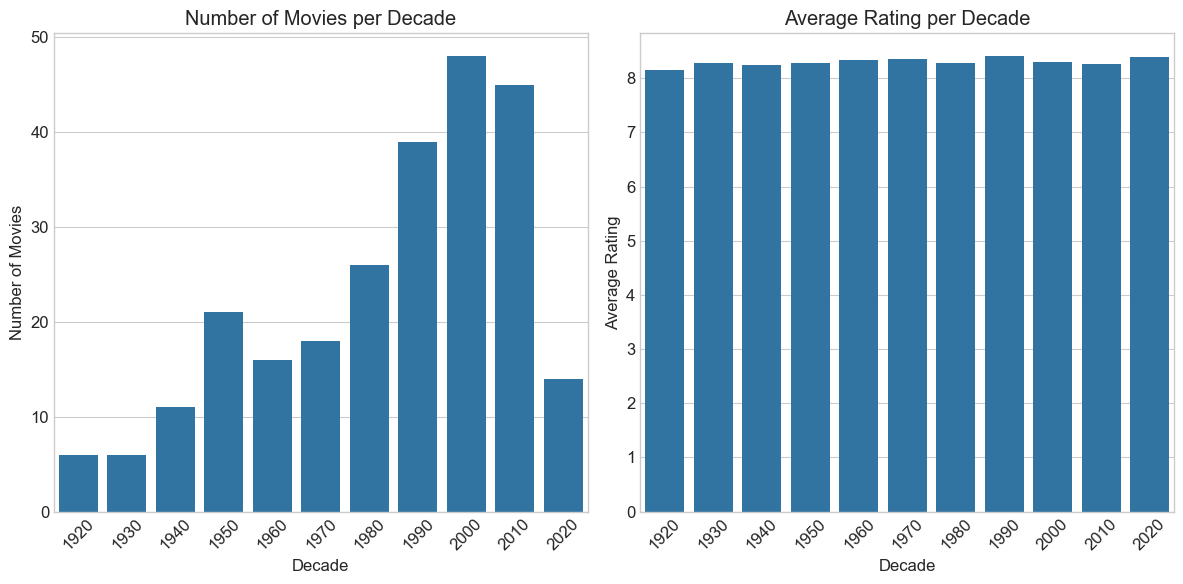

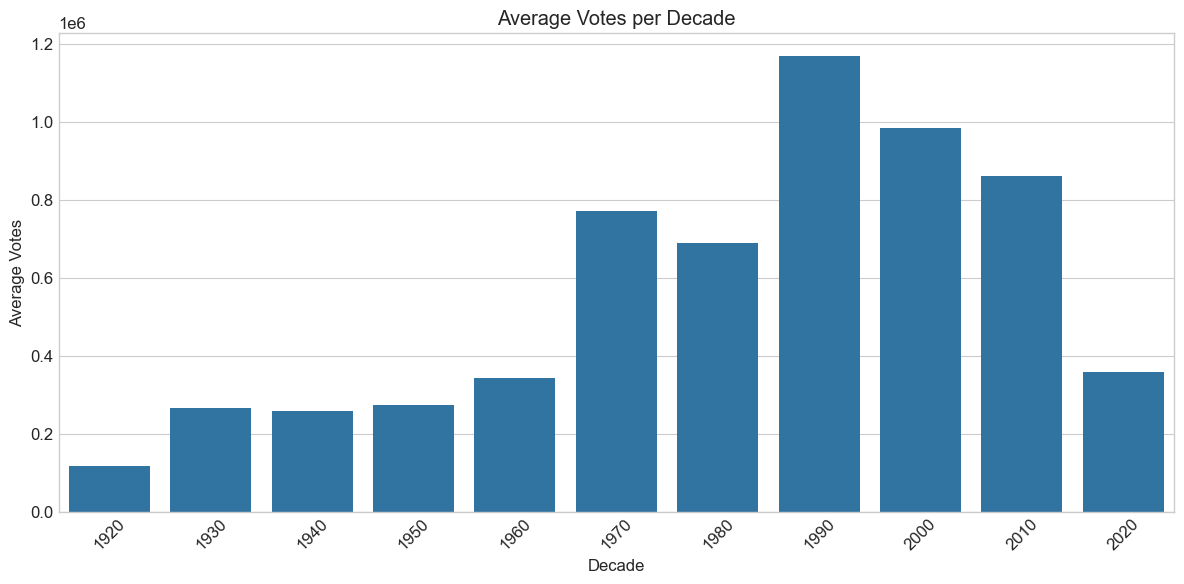

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Create decade column
df['decade'] = (df['Year'] // 10) * 10

# Calculate decade statistics
decade_stats = df.groupby('decade').agg(
    movie_count=('Name', 'count'),
    avg_votes=('Votes', 'mean'),
    avg_rating=('Rating', 'mean')
).reset_index()

# Display statistics
print("Decade Statistics:")
display(decade_stats)

# Number of movies per decade
plt.subplot(1, 2, 1)
sns.barplot(x='decade', y='movie_count', data=decade_stats)
plt.title('Number of Movies per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

# Average ratings per decade
plt.subplot(1, 2, 2)
sns.barplot(x='decade', y='avg_rating', data=decade_stats)
plt.title('Average Rating per Decade')
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Average votes per decade
plt.figure(figsize=(12, 6))
sns.barplot(x='decade', y='avg_votes', data=decade_stats)
plt.title('Average Votes per Decade')
plt.xlabel('Decade')
plt.ylabel('Average Votes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Genre Analysis
### Task: Count the number of movies in each genre (note that a movie can have multiple genres).

Genre Distribution:


,Genre,Movie_Count
0,R,97
1,PG,37
2,PG-13,35
3,Not Rated,23
4,Approved,21
5,G,17
6,Passed,5
7,(Banned),4
8,17,4
9,NC-17,1


/var/folders/q_/8yf60dmj12zb6s7t_hk0t7y40000gn/T/ipykernel_7280/2726398767.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Movie_Count', y='Genre', data=genre_counts, palette='viridis')


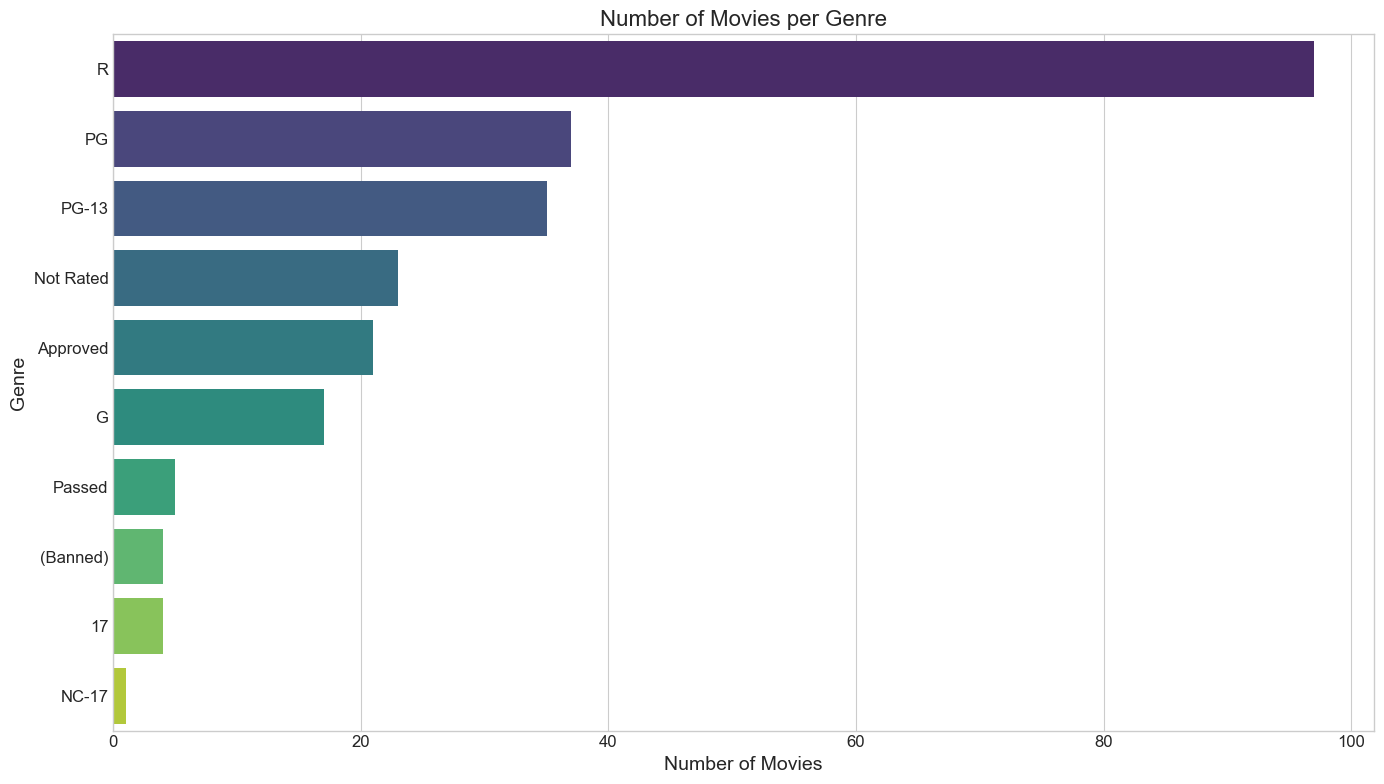

In [15]:
# Handle multiple genres (split and explode)
df['Genre'] = df['Genre'].str.split(', ')
genre_df = df.explode('Genre')
genre_counts = genre_df['Genre'].value_counts().drop('N/A', errors='ignore').reset_index()
genre_counts.columns = ['Genre', 'Movie_Count']

# Display results
print("Genre Distribution:")
display(genre_counts)

# Visualize
plt.figure(figsize=(14, 8))
sns.barplot(x='Movie_Count', y='Genre', data=genre_counts, palette='viridis')
plt.title('Number of Movies per Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Country Analysis
### Task: Find the top three countries with the largest number of movies and calculate their average votes.

Top 3 Countries by Movie Count:


,Country,movie_count,avg_votes
2,United States,194,869721.649485
1,United Kingdom,48,884895.833333
0,France,24,480541.666667


/var/folders/q_/8yf60dmj12zb6s7t_hk0t7y40000gn/T/ipykernel_7280/2795343399.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='movie_count', data=top_country_stats, ax=ax1, palette='pastel')
/var/folders/q_/8yf60dmj12zb6s7t_hk0t7y40000gn/T/ipykernel_7280/2795343399.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='avg_votes', data=top_country_stats, ax=ax2, palette='muted')


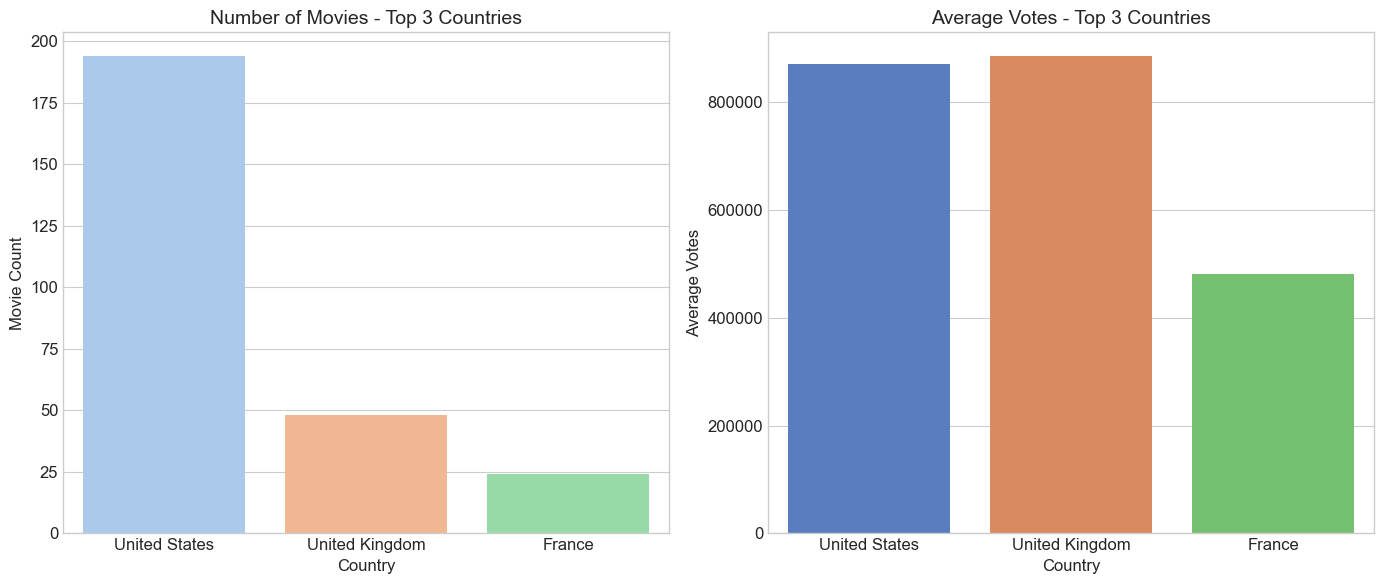

In [16]:
df['Country'] = df['Country'].str.split(', ')  # Split multiple countries
country_df = df.explode('Country').dropna(subset=['Country'])  # Expand and remove NaNs

# Get top 3 countries by movie count
top_countries = country_df['Country'].value_counts().head(3).index.tolist()

# Filter data for top countries and calculate stats
top_country_stats = country_df[country_df['Country'].isin(top_countries)].groupby('Country').agg(
    movie_count=('Name', 'count'),
    avg_votes=('Votes', 'mean')
).reset_index().sort_values('movie_count', ascending=False)

# Display results
print("Top 3 Countries by Movie Count:")
display(top_country_stats)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Movie count
sns.barplot(x='Country', y='movie_count', data=top_country_stats, ax=ax1, palette='pastel')
ax1.set_title('Number of Movies - Top 3 Countries', fontsize=14)
ax1.set_xlabel('Country', fontsize=12)
ax1.set_ylabel('Movie Count', fontsize=12)

# Average votes
sns.barplot(x='Country', y='avg_votes', data=top_country_stats, ax=ax2, palette='muted')
ax2.set_title('Average Votes - Top 3 Countries', fontsize=14)
ax2.set_xlabel('Country', fontsize=12)
ax2.set_ylabel('Average Votes', fontsize=12)
ax2.ticklabel_format(style='plain', axis='y')  # Avoid scientific notation

plt.tight_layout()
plt.show()

## Correlation Analysis
### Task1: Analyze the correlation between movie ratings and number of votes, and create a scatter plot.
### Task2: Plot a correlation heatmap between the three variables: rating, number of votes and release year.

Correlation between Rating and Votes: 0.5758


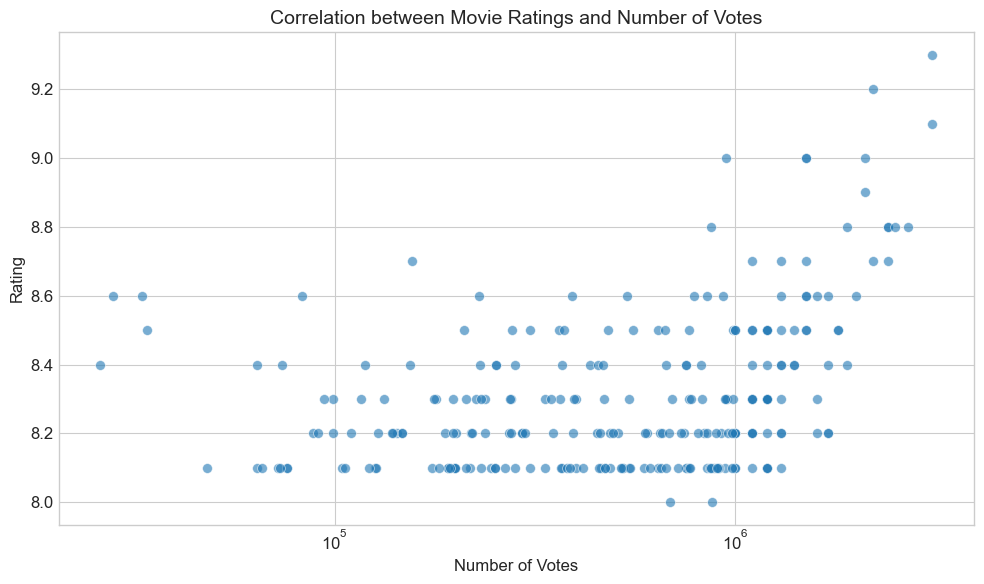

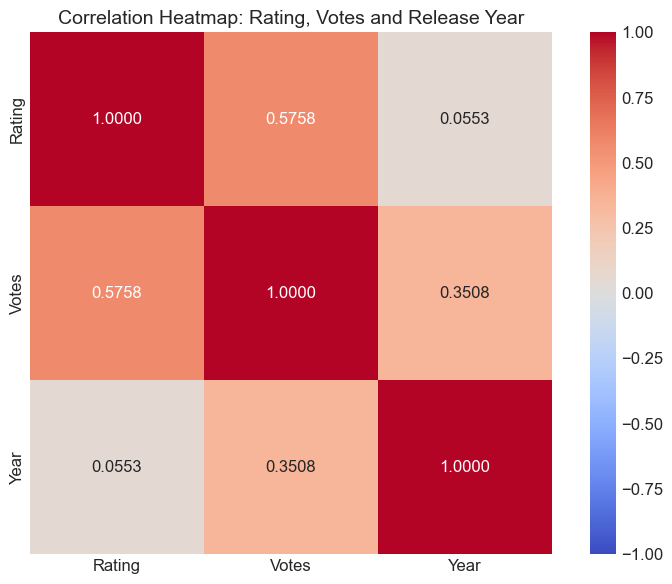

In [17]:
# Correlation Analysis

# Task 1: Correlation between Ratings and Votes
# Calculate correlation coefficient
rating_votes_corr = df['Rating'].corr(df['Votes'])
print(f"Correlation between Rating and Votes: {rating_votes_corr:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', data=df, alpha=0.6, edgecolor='w', s=50)
plt.title('Correlation between Movie Ratings and Number of Votes', fontsize=14)
plt.xlabel('Number of Votes', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xscale('log')  # Use log scale for better visualization of vote distribution
plt.tight_layout()
plt.show()

# Task 2: Correlation heatmap between Rating, Votes and Year
# Select relevant columns and calculate correlations
correlation_matrix = df[['Rating', 'Votes', 'Year']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.4f', square=True)
plt.title('Correlation Heatmap: Rating, Votes and Release Year', fontsize=14)
plt.tight_layout()
plt.show()